# Módulo IV - 01 - Introducción a la Ciencia de Datos
***

El manejo de datos que hemos visto hasta ahora como muestra de las herramientas de Python
puede volverse menos flexible cuando se trata de manejar mayores cantidades de datos, cuando se quiera hacer uso de bases de datos mas eficientes. En el área de ciencia de datos, los usuarios de Python cuentan con herramientas específicas para mejorar este manejo. Para instalarlas, escribe en tu terminal:

```python
conda install numpy pandas scipy matplolib scikit-learn
```

## Numpy
***

**Numpy** es el paquete por excelencia para manejar arreglos numéricos, matrices y conjuntos de datos multidimensionales, de forma eficiente.  Para usar numpy, sólo importamos el paquete como hemos aprendido:

In [5]:
import numpy as np
x = np.arange(1,10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Con la instrucción **np.arange(1,10)** acabamos de crear un vector numérico desde el 1 hasta el 9. Es similar a la función **range()** que hemos usado anteriormente.

Sobre estos arreglos numéricos podemos realizar operaciones qe no son posibles con listas. Por ejemplo:

In [6]:
l = [1,2,3,4]
l1 = [5,6,7,8]
l*2

[1, 2, 3, 4, 1, 2, 3, 4]

Con la útlima operación logramos duplicar la lista con los mismos elementos. ¿Pero qué pasa si lo que queríamos era multiplicar por 2 cada elemento de la lista? Quizá con comprensión de listas podemos lograrlo:

In [7]:
[i*2 for i in l]

[2, 4, 6, 8]

Si queremos elevar al cuadrado los elementos de la lista **l**, obtendremos un error. Al igual que si intentamos multiplicar dos listas:

In [8]:
l**2
l*l1

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Sin embargo, utilizando un array de numpy podemos fácilmente operar:

In [9]:
x*2

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [10]:
x**2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

In [11]:
x1 = np.arange(11,20)
x*x1

array([ 11,  24,  39,  56,  75,  96, 119, 144, 171])

Recordando nuestra variable precios, podemos intentar restarle a todos un descuento. La lista que teníamos anteriormente era:

In [12]:
precios = [12000, 9850.5, 9000.0, 30000.0, 18000.0,
           12000.0, 11000, 15000.0, 6000.0, 18000, 8000.0]
descuento = 1000           # descuento para aplicar

In [13]:
precios-100

TypeError: unsupported operand type(s) for -: 'list' and 'int'

Nos arroja un error dado que no está definida una resta entre tipos listas y entero. Tendríamos que construir otro bucle o comprension de listas para lograr el resultado.

In [14]:
[i - 100 for i in precios]

[11900,
 9750.5,
 8900.0,
 29900.0,
 17900.0,
 11900.0,
 10900,
 14900.0,
 5900.0,
 17900,
 7900.0]

A pesar de que podemos obtener lo que buscamos con bucles *for* y comprensión de listas, debemos tener en cuenta que el uso de **Numpy** aumenta la **eficiencia** con la que se ejecutan las operaciones. Además que permite otra variedad de operaciones numéricas importantes.

In [15]:
numprecios = np.array(precios)    # convierte la lista de precios en un array de numpy
numprecios * 2     # multiplica cada elemento del array individualmente, por dos.

array([ 24000.,  19701.,  18000.,  60000.,  36000.,  24000.,  22000.,
        30000.,  12000.,  36000.,  16000.])

In [16]:
numprecios - 100   # resta 100 unidades a cada elemento del array.

array([ 11900. ,   9750.5,   8900. ,  29900. ,  17900. ,  11900. ,
        10900. ,  14900. ,   5900. ,  17900. ,   7900. ])

Podemos presionar la tecla <tab> para revisar los métodos disponibles para aplicar sobre los array de **numpy**:
```python    
numprecios.<tab> 
```
![Métodos sobre array de numpy](images/020-numpymetodos.png)

Podemos ver el tamaño del arreglo como siempre (número de elementos):

In [17]:
len(numprecios)

11

Pero además, podemos ver las dimensiones del mismo haciendo:

In [18]:
numprecios.shape

(11,)

Siendo el primer valor de la tupla resultante el número de filas y el segundo el número de columnas en caso de tener estructuras de más de dos dimensiones como matrices.

**Numpy** cuenta con sus propios tipos de variable para manejar con mayor precisión las operaciones: enteros, flotantes, complejos, booleanos, strings, entre otros.

![Tipos de datos de numpy](images/021-numpydatos.png)

In [19]:
np.int64

numpy.int64

Si queremos convertir el arreglo a otro tipo distinto de dato, usamos la funcion **astype(tipo_de_dato)**:

In [20]:
x.astype(int)
x.dtype  #nos informa que tipo de variable contiene el array

dtype('int64')

Para construir una matriz, podemos modificar las dimensiones del array, al contrario de la lista que sólo es unidimensional. La función reshape cambia la forma del array según las dimensiones que especifiquemos:

In [21]:
matriz = x.reshape((3,3))
matriz

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [22]:
print(matriz.dtype)   # tipo de objeto
print(matriz.ndim)    # número de dimensiones del objeto

int64
2


Ahora que tenemos una matriz, incluso podemos aplicar operaciones matemáticas típicas para ella: productos, transpuestas, y en general de álgebra lineal, entre otros:

![Métodos para matrices](images/022-matrizmetodo.png)

In [23]:
matriz.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

La instrucción anterior es una forma abreviada de usar la función **transpose** de numpy, que nos arroja el mismo resultado:

In [24]:
np.transpose(matriz)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Las operaciones aritméticas básicas pueden aplicarse tanto con operadores binarios como métodos explícitos, ofreciendo el mismo resultado:

In [25]:
a = np.array([1,2,3])
b = np.array([(1.5,2,3), (4,5,6)], dtype = float)
c = np.array([[(1.5,2,3), (4,5,6)], [(3,2,1), (4,5,6)]],dtype=float)

In [26]:
a + b   # suma con operador

array([[ 2.5,  4. ,  6. ],
       [ 5. ,  7. ,  9. ]])

In [27]:
np.add(a,b)    # suma con método

array([[ 2.5,  4. ,  6. ],
       [ 5. ,  7. ,  9. ]])

In [28]:
a/b

array([[ 0.66666667,  1.        ,  1.        ],
       [ 0.25      ,  0.4       ,  0.5       ]])

...es equivalente a 

In [29]:
np.divide(a,b)

array([[ 0.66666667,  1.        ,  1.        ],
       [ 0.25      ,  0.4       ,  0.5       ]])

In [30]:
a*b

array([[  1.5,   4. ,   9. ],
       [  4. ,  10. ,  18. ]])

...es equivalente a

In [31]:
np.multiply(a,b)

array([[  1.5,   4. ,   9. ],
       [  4. ,  10. ,  18. ]])

Incluso podemos calcular funciones trigonométricas para cada valor con **np.cos(a)** y **np.sin(a)**, o raíces cuadradas con **np.sqrt(a)**

In [32]:
numprecios.sum()

148850.5

In [33]:
numprecios.max()

30000.0

In [34]:
numprecios.min()

6000.0

No tenemos que construir una función para calcular la media, con un array de numpy hacemos directamente:

In [35]:
numprecios.mean()

13531.863636363636

Incluso las medidas estadísticas más comunes como [desviación estándar](https://es.wikipedia.org/wiki/Desviación_típica), [varianza](https://es.wikipedia.org/wiki/Varianza) y [mediana](https://es.wikipedia.org/wiki/Mediana_(estadística)):

In [36]:
numprecios.var()   # varianza de un conjunto de datos

40527971.095041327

In [37]:
numprecios.std()   # desviación estándar de un conjunto de datos

6366.1582681426735

In [38]:
np.median(numprecios)   # mediana de los datos

12000.0

Todas las operaciones usuales con listas, como ordenar, concatenar, anexar, insertar, eliminar elementos, extraer subsecciones y realizar operaciones lógicas pueden realizarse intuitivamente con numpy.

In [39]:
numprecios[0:2]

array([ 12000. ,   9850.5])

In [40]:
numprecios[1]

9850.5

Y para acceder a los elementos de una matriz o cualquier objeto multidimensional, usamos los índices para cada dimensión:

In [41]:
matriz[0:2, 1]   # en la primera posición los elementos de las filas
                 # y el la segunda posición lo elementos de la columna

array([2, 5])

La comparación de arrays puede hacerse tanto elemento a elemento, como por objeto completo:

In [42]:
numprecios = np.array([9000,4000,5000])
numprecios2 = numprecios
numprecios3 = np.array([9000,2000,6790])

In [43]:
numprecios == numprecios3

array([ True, False, False], dtype=bool)

In [44]:
np.array_equal(numprecios, numprecios2)

True

In [45]:
np.array_equal(numprecios, numprecios3)

False

De igual manera para las demás condiciones lógicas que apliquen:

In [46]:
numprecios < 5000

array([False,  True, False], dtype=bool)

Incluso podemos elegir subsecciones de acuerdo a las condiciones:

In [47]:
matriz[matriz < 2]

array([1])

In [48]:
numprecios[numprecios < 5000]

array([4000])

In [49]:
np.insert(numprecios,len(numprecios),7000)

array([9000, 4000, 5000, 7000])

La línea anterior inserta un nuevo elemento al final del array. El primer argumento es el array que queremos modificar, el segundo es la posición dentro del array donde queremos colocar el elemento, y el último es el contenido a insertar.

Para insertar al final automáticamente podemos usar directamente la función **append**:

In [50]:
np.append(numprecios, 8000)

array([9000, 4000, 5000, 8000])

In [51]:
np.delete(numprecios, [1,2]) # elimina los elementos en las posiciones 1 y 2 del array numprecios

array([9000])

Podemos anexar listas completas de precios y construir una con todos los valores, concatenando cada array:

In [52]:
p = np.array([2000,6000])   # nuevos precios a anexar
np.concatenate((numprecios, p))   # une las dos listas de precios 

array([9000, 4000, 5000, 2000, 6000])

Y una de las funciones más utiles, para dividir el la lista de elementos, es intuitivamnte la funcion **split**:

In [53]:
np.split(x,3) 

[array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]

Esta funcion divide el array en 3 sub arrays del mismo tamaño. Por lo que el segundo argumento debe ser un multiplo del tamaño total.

Hay dos variantes de esta función: split horizontal y vertical. También debe usarse múltiplos de las dimensiones de los arrays para no obtener errores.

In [52]:
np.hsplit(b,2)  #completar explanation

np.vsplit(b,3) #completar explanation

ValueError: array split does not result in an equal division

## Pandas
***

Es conveniente contar con una estructura que nos pemita mantener nuestros datos de forma organizada, como una base de datos, tal como una tipica tabla en excel. 
Así podríamos tener, por ejemplo información como:

| producto | precio | tienda | dirección | estacionamiento | punto |
|--------------|----------------|----------------------------------|
|arroz | 9000 |  los chinos de la esquina| Av 5 calle 10| False | True|

Pandas es un paquete construido con base en los arrays de numpy, que provee una estrcutura con columnas y filas etiquetadas, llamadas dataframe, para manipular registros de datos, variables y valores de distintos tipos.

Los datos que tenemos hasta los momentos de nuestras compras, formaban algunas variables:

In [54]:
nombres = ["azucar","arroz","harina", "aceite"]
precios = [9850.5, 9000, 12000, 18000]

tienda1 = "los chinos de la esquina"
tienda2 = "supermercado MUNDO"
tienda3 = "Abasto el rey"
tienda4 = "la bodega de Juan"

tiendas = [tienda1, tienda2, tienda3, tienda4]

direcciones = ["Avenida 5 CALLe 10", "av 4 calle 25 edif c", 
               "AV LORA CALLE 23", "av Don tulio edif Uno calle 32"]

# variables lógicas que indican False o True dependiendo 
# si hay o no estacionamiento o punto de venta en cada lugar.
estacionamientos = [True, True, False, False]
puntos = [True, False, True, False]

# en forma de diccionario
productos = {'azucar':9000.0, 'arroz':9850.5, 'harina':11000, 'aceite':12000, 'pasta':18000}

Es muy conveniente que tengamos organizados estos datos dentro de un dataframe. Esto permite además poder realizar una cantidad de operaciones y análisis estadísticos y descriptivos sobre los datos.

Para crear un dataframe en pandas, primero debemos importar el paquete y luego usar la función **DataFrame()**:

In [55]:
import pandas as pd
df = pd.DataFrame({'grupo': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'valor': [1, 2, 3, 4, 5, 6]})

Nota que la estructura que recibe la función **DataFrame** es un diccionario de python, definido entre llaves, con pares *clave:valor*.

Igual que en un diccionario, podemos acceder a las columnas por medio de sus etiquetas o nombres:

In [56]:
df['grupo']

0    A
1    B
2    C
3    A
4    B
5    C
Name: grupo, dtype: object

Ademas las operaciones sobre lel contenido se hace de manera directa, por ejemplo, la suma de la columna "valor":

In [58]:
df['valor'].sum()

21

Nota que esta función se aplica sobre el array de numpy resultante de la selección. 

Ademas, si se quiere aplicar operaciones según los grupos, podemos facilmente agrupar cada conjunto de datos y aplicar las funciones:

In [59]:
df.groupby('grupo').sum()  # suma de los valores según los grupos

,valor
grupo,
A,5
B,7
C,9


En esta instrucción, primero agrupamos segun la variable "grupo" y a este resultado le aplicamos la función suma. Una función muy utilizada cuando se trabaja con categorías de datos y clasificaciones.

Para crear el dataframe con nuestras compras, utilizamos las listas que y teniamos guardadas, como pares clave valor de la forma **'nombre-de-columna': variable**.

In [60]:
compras = pd.DataFrame({'productos': nombres, 'precios': precios, 'tienda': tiendas,
                        'direccion':direcciones, 'estacionamiento':estacionamientos,'punto':puntos})

O de igual manera, podemos pasarle una lista con todas las listas de datos, y espcificarle los nombres de las columnas:

In [61]:
compras = pd.DataFrame(list(zip(nombres, precios, tiendas, direcciones, estacionamientos,puntos)), 
                       columns=['producto', 'precio','tienda','direccion','estacionamiento','punto'])
compras

,producto,precio,tienda,direccion,estacionamiento,punto
0,azucar,9850.5,los chinos de la esquina,Avenida 5 CALLe 10,True,True
1,arroz,9000.0,supermercado MUNDO,av 4 calle 25 edif c,True,False
2,harina,12000.0,Abasto el rey,AV LORA CALLE 23,False,True
3,aceite,18000.0,la bodega de Juan,av Don tulio edif Uno calle 32,False,False


In [62]:
compras['precio'] # elige una columna por nombre

0     9850.5
1     9000.0
2    12000.0
3    18000.0
Name: precio, dtype: float64

In [63]:
compras[1:3] # elige varias columnas por indices, subsección

,producto,precio,tienda,direccion,estacionamiento,punto
1,arroz,9000.0,supermercado MUNDO,av 4 calle 25 edif c,True,False
2,harina,12000.0,Abasto el rey,AV LORA CALLE 23,False,True


Pandas incluye sus  propias funciones para lectura y escritura de archivos. Podemos leer un .csv con la función **read_csv**:

In [64]:
import pandas as pd
datos = pd.read_csv('compras.csv')

Ahora modificamos los datos:

In [65]:
datos['amount_x_2'] = datos['amount']*2

NameError: name 'data' is not defined

Y los guardamos nuevamente en el mismo archivo con la funcion **to_csv**.

In [ ]:
data.to_csv('ch02-data_more.csv)

De esta manera se reduce sustancialmente el código que hemos utilizado antes para lectura y escritura de archivos con las librerías básicas de Python.

## Matplotlib

Cuando tenemos un conjnto de datos y además queremos analizarlo, una de las primeras cosas que podemos hacer es construir gráficos para visualizar su forma y comportamiento. Es la mejor forma de iniciar análisis descriptivos que nos ayuden a tener una idea clara de cuáles serán los próximos pasos de nuestro estudio.

Matplotlib es una librería de Python capaz de generar gráficos en dos dimensiones, con de excelente calidad, sin exagerar en la cantidad de código e instrucciones que debes usar. Además, Matplotlib se integra sin problemas con arrays de Numpy.

Pyplot, es un módulo de Matplotlib que genera gráficos similares a la plataforma de cálculo matemático MATLAB. Para usar estas funcionalidades, importamos el módulo como:

In [2]:
import matplotlib.pyplot as plt

Con la función **plot** generamos nuestro primer gráfico, usando una lista de puntos *[1,2,3,4]*:

In [66]:
plt.plot([1,2,3,4])

En este punto no se visualiza aun el gráfico, sólo generamos el objeto 2D. la función **show** despliega el resultado:

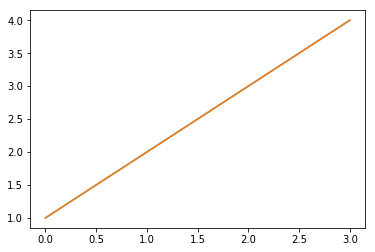

In [67]:
plt.show()

Un gráfico en dos dimensiones se compone de coordenadas *x* en el eje horizontal y *y* en el vertical. La función **plot** recibe el conjunto de puntos para cada una, pero en este caso introducimos sólo un vector. Pyplot asume que el vector numérico corresponde a las coordenadas **y**, y genera automáticamente valores para el eje **x**.

Si especificamos ambas coordenadas, el primer vector será **x** y el segundo **y**. Adicionalmente podemos especificar un tercer argumento para modificar el color y el estilo de la línea:

In [68]:
x = np.arange(1,20)    # array de numpy con números de 1 a 19
y = x ** 2             # 'y' contiene los elementos de 'x' al cuadrado
plt.plot(x,y,'ro')

El argumento **'ro'** establece el color, seguido del tipo de línea, en este caso **red** y **o** (puntos o círculos).

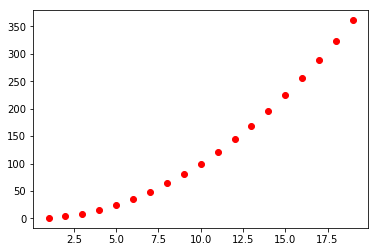

In [69]:
plt.show()

Otros estilos de líneas que puedes utilizar son:

+ Cuadrados: **'s'**
+ Triángulos: **'^'**
+ Líneas discontínuas: **'--'**

Por defecto la función **plot** usa **'b-'**, (línea contínua azul).

In [71]:
plt.plot(x,y,'go')    # Color verde (green) con puntos
plt.ylabel("f(x)")    # Etiqueta o nombre para el eje vertical
plt.xlabel('x')       # Etiqueta o nombre para el eje horizontal
plt.axis([0,6,0,20])  # Rangos para los ejes

[0, 6, 0, 20]

Con **ylabel** y **xlabel** se definen los nombres de los ejes de coordenadas. El vector *[0, 6, 0, 20]* se usa para establecer los límites de cada eje: los dos primeros valores para **x**, los dos segundos para **y**.

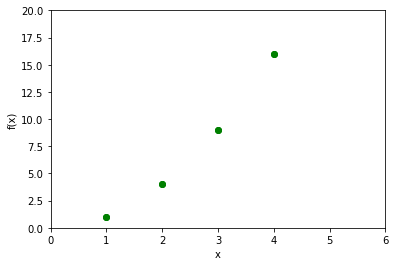

In [72]:
plt.show()

Para comparar varias curvas en un mismo gráfico, es tan simple como colocar en llamada de **plot** cada par de coordenadas:

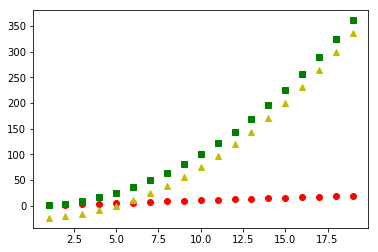

In [84]:
plt.plot(x, x, 'ro', x, y,'gs', x, y-25, 'y^')
plt.show()


***
> Escribe el código para graficar los precios que tenemos hasta ahora de nuestras compras! Usa los colores y formas que desees. (El argumento **linewidth** aumenta o disminuye el grosor de la línea según números reales).

***

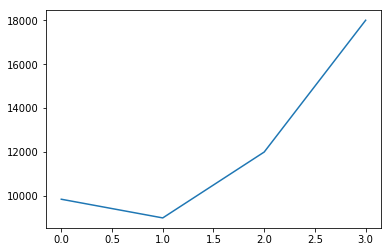

In [85]:
plt.plot(precios)
plt.show()

El eje x generado automáticamente no es explicativo para el tipo de datos que tenemos. Prefeririamos que aparecieran los nombres de cada producto segun el precio que les corresponde. Para agregar estas etiquetaas, la función **xticks** construye la estructura haciendo uso de la lista de nombres y la cantidad de elementos que tengamos:

In [92]:
plt.plot(precios, 'ro')
plt.xticks(np.arange(len(nombres)),nombres)

([<matplotlib.axis.XTick at 0x7f9b38f77b70>,
 <a list of 4 Text xticklabel objects>)

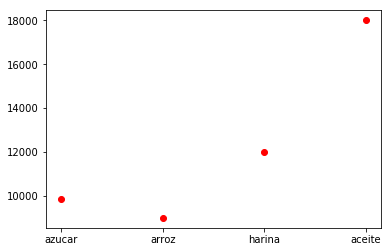

In [93]:
plt.show()

Aunque es evidente la diferencia de los precios entre cada producto, el uso de puntos no para visualizar no es muy conveniente. Este tipo de datos podemos observarlo de mejor manera con un gráfico de barras:

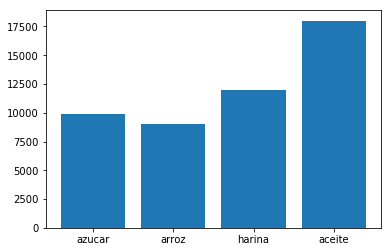

In [97]:
plt.bar(np.arange(len(nombres)),precios)
plt.xticks(np.arange(len(nombres)),nombres)
plt.show()

La función **bar** recibe un conjunto de números que indican el inicio de cada barra en el eje **x**, además de los valores para la altura de cada barra. En nuestro caso, creamos un rango de número según la cantidad de productos que tenemos usando ``np.arange(len(nombres))``: [0,1,2,3].

Aprovechemos de usar nuestro *dataframe* **compras** para extraer los precios y nombres para el gráfico, y confirmar que obtenemos el mismo resultado:

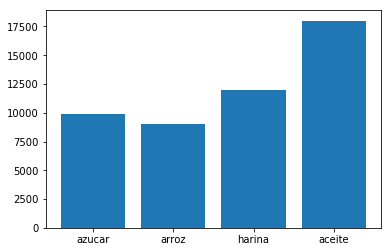

In [102]:
xcoordenadas = np.arange(len(compras['producto'])) # coordenadas para el eje x
plt.bar(xcoordenadas,compras['precio'], tick_label = compras['producto'])  # generando el gráfico de barras
plt.show()

Nota que las etiquetas para el eje **x** también pueden especificarse dentro de la función **bar**, por medio del argumento **tick_label**, sin necesidad de usar separadamente la instrucción **xticks**.

| [Atrás](Módulo III - Funciones, lectura y escritura de archivos.ipynb) | [Inicio](Introducción - Contenido.ipynb) | [Siguiente](Módulo IV - 02 - Introducción a Jupyter Notebook.ipynb)